In [5]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

for i in range(50):
    random_younger =randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older =randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger =randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older =randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

# for i in train_samples:
#     print(i)
# for i in train_labels:
#     print(i)

# list 转 np.array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
train_labels, train_samples = shuffle(train_labels, train_samples)
# change [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
print(train_samples.shape)
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
print(scaler_train_samples.shape)
for i in scaler_train_samples:
    print(i)

(2100,)
(2100, 1)
[0.10344828]
[0.62068966]
[0.22988506]
[0.03448276]
[0.65517241]
[0.82758621]
[0.59770115]
[0.03448276]
[0.49425287]
[0.54022989]
[0.87356322]
[0.59770115]
[0.18390805]
[0.77011494]
[0.44827586]
[0.62068966]
[0.77011494]
[0.51724138]
[0.88505747]
[0.88505747]
[0.31034483]
[0.04597701]
[0.66666667]
[0.27586207]
[0.43678161]
[0.6091954]
[0.47126437]
[0.5862069]
[0.96551724]
[0.09195402]
[0.90804598]
[0.70114943]
[0.56321839]
[0.8045977]
[0.03448276]
[0.44827586]
[0.88505747]
[0.33333333]
[0.52873563]
[0.14942529]
[0.75862069]
[1.]
[0.91954023]
[0.01149425]
[0.70114943]
[0.35632184]
[0.45977011]
[0.79310345]
[1.]
[0.66666667]
[0.59770115]
[0.11494253]
[0.03448276]
[0.06896552]
[0.7816092]
[0.81609195]
[0.75862069]
[0.5862069]
[0.51724138]
[0.93103448]
[0.77011494]
[0.35632184]
[0.59770115]
[0.54022989]
[0.04597701]
[0.63218391]
[0.85057471]
[0.50574713]
[0.35632184]
[0.02298851]
[0.48275862]
[0.90804598]
[0.63218391]
[0.94252874]
[0.74712644]
[0.95402299]
[0.42528736]
[0

[0.08045977]
[0.2183908]
[0.70114943]
[0.35632184]
[0.29885057]
[0.89655172]
[0.27586207]
[0.49425287]
[0.70114943]
[0.32183908]
[0.87356322]
[0.09195402]
[0.72413793]
[0.4137931]
[0.6091954]
[0.94252874]
[0.82758621]
[0.59770115]
[0.57471264]
[0.64367816]
[0.91954023]
[0.81609195]
[0.09195402]
[0.79310345]
[0.35632184]
[0.66666667]
[0.73563218]
[0.63218391]
[0.31034483]
[0.57471264]
[0.47126437]
[0.31034483]
[0.49425287]
[0.82758621]
[0.43678161]
[0.87356322]
[0.71264368]
[1.]
[0.68965517]
[0.70114943]
[0.10344828]
[0.37931034]
[0.27586207]
[0.34482759]
[0.97701149]
[0.67816092]
[0.4137931]
[0.24137931]
[0.85057471]
[0.79310345]
[0.18390805]
[0.59770115]
[0.47126437]
[1.]
[0.51724138]
[0.59770115]
[0.3908046]
[0.91954023]
[1.]
[0.36781609]
[0.91954023]
[0.43678161]
[0.22988506]
[0.70114943]
[0.81609195]
[0.33333333]
[0.55172414]
[0.81609195]
[0.13793103]
[0.82758621]
[0.32183908]
[0.64367816]
[0.1954023]
[0.45977011]
[0.29885057]
[0.72413793]
[0.7816092]
[0.7816092]
[0.65517241]
[0.41

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])
model.summary()



Num GPUs Available 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(x=scaler_train_samples, y=train_labels, batch_size=10, epochs=30,
#           shuffle=True, verbose=2)

model.fit(x=scaler_train_samples, y=train_labels,
          validation_split=0.1, batch_size=10, epochs=30,shuffle=True, verbose=2)


Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.6860 - accuracy: 0.4820 - val_loss: 0.6788 - val_accuracy: 0.5333
Epoch 2/30
1890/1890 - 0s - loss: 0.6631 - accuracy: 0.5905 - val_loss: 0.6575 - val_accuracy: 0.6333
Epoch 3/30
1890/1890 - 0s - loss: 0.6379 - accuracy: 0.6815 - val_loss: 0.6345 - val_accuracy: 0.6905
Epoch 4/30
1890/1890 - 0s - loss: 0.6105 - accuracy: 0.7228 - val_loss: 0.6107 - val_accuracy: 0.7095
Epoch 5/30
1890/1890 - 0s - loss: 0.5849 - accuracy: 0.7582 - val_loss: 0.5870 - val_accuracy: 0.7381
Epoch 6/30
1890/1890 - 0s - loss: 0.5588 - accuracy: 0.7794 - val_loss: 0.5628 - val_accuracy: 0.7619
Epoch 7/30
1890/1890 - 0s - loss: 0.5322 - accuracy: 0.7979 - val_loss: 0.5375 - val_accuracy: 0.7714
Epoch 8/30
1890/1890 - 0s - loss: 0.5054 - accuracy: 0.8190 - val_loss: 0.5112 - val_accuracy: 0.8143
Epoch 9/30
1890/1890 - 0s - loss: 0.4777 - accuracy: 0.8349 - val_loss: 0.4848 - val_accuracy: 0.8333
Epoch 10/30
1890/1890 - 0s - loss: 

In [11]:
test_labels = []
test_samples = []

for i in range(10):
    random_younger =randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older =randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger =randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older =randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

predictions = model.predict(x=scaler_test_samples, batch_size=10, verbose=0)
for i in predictions:
    print(i)


[0.59590065 0.40409935]
[0.6268633 0.3731367]
[0.65681994 0.34318006]
[0.02184266 0.97815734]
[0.94859546 0.05140449]
[0.02950401 0.97049594]
[0.03179454 0.9682055 ]
[0.40279993 0.5972001 ]
[0.78600466 0.2139953 ]
[0.15478946 0.84521055]
[0.02950401 0.97049594]
[0.07729039 0.92270964]
[0.03425661 0.96574336]
[0.26005816 0.73994184]
[0.01740911 0.98259085]
[0.9291648  0.07083511]
[0.9291648  0.07083511]
[0.9523097  0.04769029]
[0.15478946 0.84521055]
[0.26005816 0.73994184]
[0.8892629  0.11073712]
[0.9523097  0.04769029]
[0.95164514 0.04835489]
[0.02539342 0.9746065 ]
[0.03179454 0.9682055 ]
[0.0686165 0.9313835]
[0.9523634  0.04763661]
[0.95214283 0.04785717]
[0.06109652 0.9389035 ]
[0.9519854  0.04801456]
[0.95247066 0.04752931]
[0.95244014 0.04755987]
[0.4667814 0.5332186]
[0.31325954 0.6867405 ]
[0.23576556 0.76423436]
[0.07729039 0.92270964]
[0.0686165 0.9313835]
[0.8445029  0.15549712]
[0.59590065 0.40409932]
[0.9523097  0.04769029]
[0.03179454 0.9682055 ]
[0.95024174 0.04975826]


In [13]:

rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
1
0
1
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
1
1
0
0
1
0
1
1
1
1


Confusion matrix, without normalization
[[190  20]
 [  9 201]]


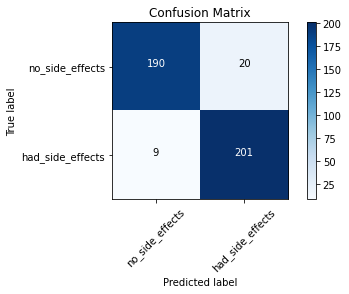

In [14]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks =np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


## 2.Svae and Load a Model

In [19]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [20]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [22]:
new_model.get_weights()

[array([[-0.08597679, -0.3432971 , -0.03595322,  0.3400611 ,  0.47113588,
          0.65394735, -0.5629101 ,  0.23175387, -0.4877224 ,  0.62345684,
         -0.5730308 , -0.45614576, -0.45394242, -0.41380578, -0.22816673,
          0.57395303]], dtype=float32),
 array([ 0.26027274,  0.        ,  0.        , -0.11480707, -0.14104196,
        -0.11033662,  0.        , -0.07769702,  0.        , -0.14952573,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00205103], dtype=float32),
 array([[ 5.56682706e-01,  4.14918691e-01,  2.38443390e-01,
         -1.53750122e-01,  2.33770967e-01, -1.29848197e-01,
          7.35556930e-02,  1.46826282e-01, -1.23918951e-01,
         -1.81505561e-03, -2.78671205e-01, -3.20109427e-02,
          6.65487275e-02,  4.25273985e-01, -4.79096919e-02,
         -1.75079182e-01, -4.61099530e-03, -3.50483567e-01,
          1.77764207e-01,  5.04999697e-01, -6.67761490e-02,
         -9.32692587e-02,  1.13318607e-01, -3.78367215e-01,
 

In [23]:
new_model.optimizer

# model.to_json()

In [24]:
json_string = model.to_json()
# yaml_string = model.to_yaml()

In [25]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [26]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [27]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3.model.save_weights()

In [12]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [13]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])
model2.load_weights('models/medical_trial_model.h5')
model2.get_weights()

[array([[-0.2199314 ,  0.42771077, -0.46386838, -0.08791107,  0.71201926,
         -0.1262899 , -0.56359124, -0.45434693,  0.72356206,  0.69763666,
         -0.19644067,  0.5640737 ,  0.23639403,  0.4598611 , -0.43190536,
         -0.3757335 ]], dtype=float32),
 array([ 0.        , -0.11167286,  0.        ,  0.        , -0.15366031,
         0.        ,  0.        ,  0.        , -0.18838277,  0.08841065,
         0.        , -0.14399788, -0.08404281, -0.14681578,  0.        ,
         0.        ], dtype=float32),
 array([[-3.35089266e-02, -3.15878659e-01, -1.15605012e-01,
         -1.63435787e-01,  1.46498978e-02,  2.87712783e-01,
         -3.12656283e-01, -1.52594015e-01, -6.56770170e-02,
          2.03540891e-01, -9.48941410e-02, -9.53136683e-02,
         -5.32060266e-02, -2.73442864e-01, -2.23508865e-01,
         -6.85384572e-02,  1.87723666e-01, -1.01917088e-02,
         -4.40928638e-02, -3.19861203e-01,  2.37382442e-01,
         -7.16857314e-02,  2.54365653e-01, -2.24114940e-01,
 

# Convolution Neural Network

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import glob
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
os.chdir('data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')
os.chdir('../../')

In [31]:
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [32]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


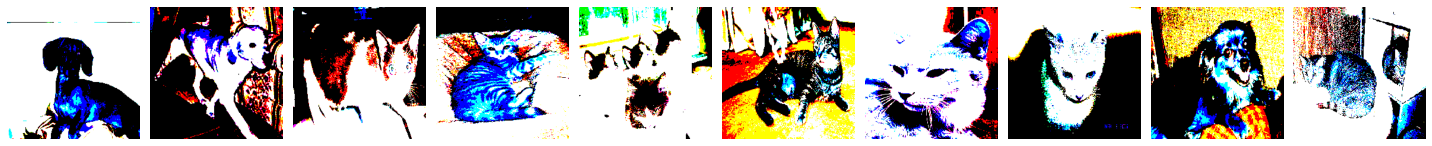

In [34]:
from sklearn.preprocessing import LabelEncoder
imgs, lavels = next(train_batches)
# imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show

plotImages(imgs)
print(labels)

 # Build and train a CNN

In [35]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 17s - loss: 18.3212 - accuracy: 0.5830 - val_loss: 4.2542 - val_accuracy: 0.5500
Epoch 2/10
100/100 - 17s - loss: 3.3889 - accuracy: 0.7250 - val_loss: 2.6880 - val_accuracy: 0.6300
Epoch 3/10
100/100 - 18s - loss: 0.5536 - accuracy: 0.8900 - val_loss: 2.7953 - val_accuracy: 0.6400
Epoch 4/10
100/100 - 18s - loss: 0.2693 - accuracy: 0.9250 - val_loss: 2.8252 - val_accuracy: 0.6550
Epoch 5/10
100/100 - 18s - loss: 0.0682 - accuracy: 0.9750 - val_loss: 2.0667 - val_accuracy: 0.6750
Epoch 6/10
100/100 - 18s - loss: 0.0257 - accuracy: 0.9920 - val_loss: 3.2761 - val_accuracy: 0.6250
Epoch 7/10
100/100 - 19s - loss: 0.0091 - accuracy: 0.9960 - val_loss: 2.6767 - val_accuracy: 0.6250
Epoch 8/10
100/100 - 22s - loss: 7.3559e-04 - accuracy: 1.0000 - val_loss: 2.3015 - val_accuracy: 0.6550
Epoch 9/10
100/100 - 22s - loss: 3.0283e-04 - accuracy: 1.0000 - val_loss: 2.3521 - val_accura

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


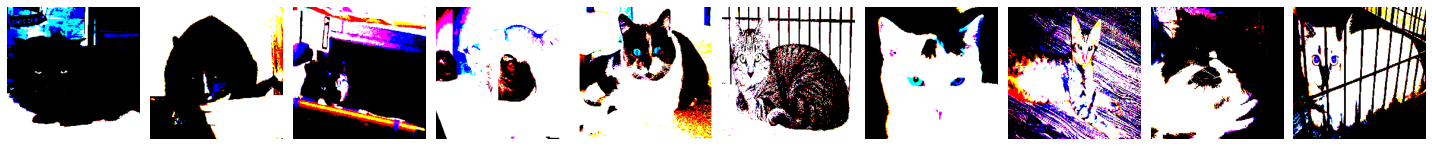

In [28]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)


In [29]:
test_batches.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
predictions = model.predict(x=test_batches, verbose=0)


In [31]:
np.round(predictions)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [32]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=1))


In [33]:
test_batches.class_indices


{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[37 13]
 [19 31]]


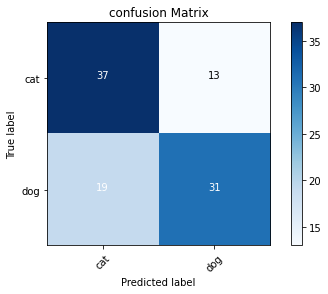

In [36]:
cm_plot_labels = ['cat', 'dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')

# Build Fine-tuned VGG 16 model

In [37]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [38]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544


In [40]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [39]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [41]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544


In [42]:
for layer in model.layers:
    layer.trainable = False

model.add(Dense(units=2, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [43]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194


# Train the fine-tuned VGG16 model

In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, validation_data=valid_batches, epochs=5,verbose=2)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 102s - loss: 0.2801 - accuracy: 0.8870 - val_loss: 0.1282 - val_accuracy: 0.9500
Epoch 2/5
100/100 - 107s - loss: 0.0954 - accuracy: 0.9660 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 103s - loss: 0.0579 - accuracy: 0.9770 - val_loss: 0.0902 - val_accuracy: 0.9700
Epoch 4/5
100/100 - 103s - loss: 0.0391 - accuracy: 0.9830 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 5/5
100/100 - 103s - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0889 - val_accuracy: 0.9550


In [49]:
predictions = model.predict(x=test_batches, verbose=0)
test_batches.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

test_batches.class_indices


{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[48  2]
 [ 3 47]]


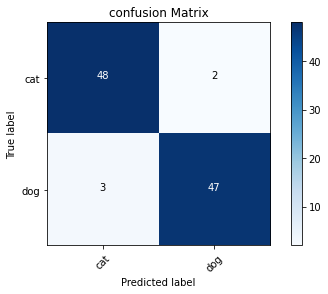

In [51]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')


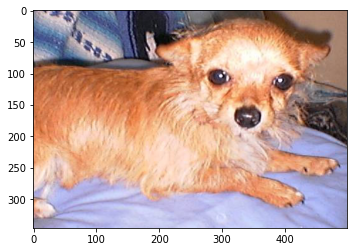

In [56]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show

gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                         channel_shift_range=10., horizontal_flip=True)
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image
assert os.path.isfile(image_path)
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])


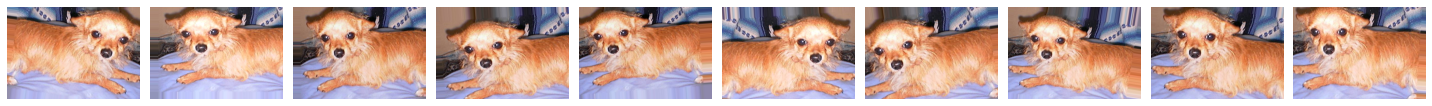

In [57]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)
